# Tratamento das Bases de Epilepsia do Rio de Janeiro de 2015 a 2022




## Observações

Para que este notebook funcione corretamente devem ser importadas as bases de dados do SIASUS de 2015 a 2022 de epilepsia do estado do Rio de Janeiro

## Coisas para fazer:

### retirar os pacientes que estao em tratamento de 03/15 pra tras e que de 11/22 pra frente

fazer uma piramide etaria

pegar data de inicio do tratamento e data de fim de cada tratamento

# Importando as Bases

In [1]:
# Import Tiago

import pandas as pd

rj_epilepsia_total = []
for i in range(2015, 2024):
    arquivo = f"../Dados/Bases sem tratamento/rj_epilepsia_{i}.csv"
    epilepsia = pd.read_csv(arquivo, sep = ',', encoding='latin-1')
    rj_epilepsia_total.append(epilepsia)


# Concatenando, Refazendo o Indice e exportando

In [2]:
# Concatenando as bases

rj_epilepsia_total = pd.concat(rj_epilepsia_total)
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201501,EP,330000,4046374,3315200161306,201501,604190018,0.0,330455,43,...,0,G404,0,NaN,13,110,N,0,N,NaN
1,201501,EP,330000,4046374,3315200115293,201501,604500084,0.0,330455,43,...,0,G403,0,NaN,55,152,N,0,N,NaN
2,201501,EP,330000,4046374,3315200117823,201501,604500076,0.0,330455,43,...,0,G400,0,NaN,0,0,N,0,N,NaN
3,201501,EP,330000,4046374,3314207160320,201412,604500017,0.0,330455,43,...,0,G404,0,NaN,50,154,N,0,N,NaN
4,201501,EP,330000,4046374,3314206988675,201501,604500084,0.0,330455,43,...,0,G404,0,NaN,25,98,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
18788,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
18789,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
18790,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [3]:
# Refazendo o Indice

rj_epilepsia_total.index = range(rj_epilepsia_total.shape[0])
rj_epilepsia_total

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,...,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,201501,EP,330000,4046374,3315200161306,201501,604190018,0.0,330455,43,...,0,G404,0,NaN,13,110,N,0,N,NaN
1,201501,EP,330000,4046374,3315200115293,201501,604500084,0.0,330455,43,...,0,G403,0,NaN,55,152,N,0,N,NaN
2,201501,EP,330000,4046374,3315200117823,201501,604500076,0.0,330455,43,...,0,G400,0,NaN,0,0,N,0,N,NaN
3,201501,EP,330000,4046374,3314207160320,201412,604500017,0.0,330455,43,...,0,G404,0,NaN,50,154,N,0,N,NaN
4,201501,EP,330000,4046374,3314206988675,201501,604500084,0.0,330455,43,...,0,G404,0,NaN,25,98,N,0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,EP,330000,3343715,3323202910291,202312,604500076,0.0,330455,68,...,0,G408,0,NaN,54,168,N,0,N,1023.0
89344,202312,EP,330000,4046374,3323202750439,202312,604500050,0.0,330455,43,...,0,G402,0,NaN,69,164,N,0,N,1023.0
89345,202312,EP,330000,3343715,3323202639691,202312,604500106,0.0,330455,68,...,0,G402,0,NaN,61,164,N,0,N,1023.0
89346,202312,EP,330000,3343715,3323202592479,202312,604500106,0.0,330455,68,...,0,G403,0,NaN,70,146,N,0,N,1023.0


In [4]:
# Export Tiago

# rj_epilepsia_total.to_csv('../Dados/Bases sem tratamento/rj_epilepsia_total.csv', sep =';')

In [5]:
# Export Bruno

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

# Formatando as colunas

## Mudando o nome das Colunas

In [6]:
# Selecionando apenas as colunas que são interessantes para a nossa analise

colunas_desejadas = ['AP_MVM', 'AP_CMP', 'AP_PRIPAL', 'AP_CNSPCN', 'AP_COIDADE', 'AP_NUIDADE', 'AP_DTSOLIC','AP_SEXO', 'AP_RACACOR', 'AP_MUNPCN', 'AP_CEPPCN', 'AP_TPATEN', 'AP_TPAPAC', 'AP_MOTSAI', 'AP_OBITO', 'AP_ENCERR', 'AP_PERMAN', 'AP_ALTA', 'AP_TRANSF', 'AP_DTOCOR', 'AP_APACANT', 'AP_CIDCAS', 'AP_CIDPRI', 'AP_CIDSEC']
rj_epilepsia_total = pd.DataFrame(rj_epilepsia_total[colunas_desejadas])
rj_epilepsia_total

,AP_MVM,AP_CMP,AP_PRIPAL,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_DTSOLIC,AP_SEXO,AP_RACACOR,AP_MUNPCN,...,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_APACANT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,1,0,0,NaN,0,0,G404,0
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,1,0,0,NaN,0,0,G403,0
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,1,0,0,NaN,0,0,G400,0
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,1,0,0,NaN,0,0,G404,0
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [7]:
# Renomeando as colunas

# novo_nome_colunas = {'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}
novo_nome_colunas = {'AP_DTSOLIC':'data_completa_atendimento' ,'AP_MVM': 'data_processamento', 'AP_CMP': 'data_atendimento_paciente', 'AP_PRIPAL': 'procedimento_principal', 'AP_CNSPCN': 'numero_cns_paciente', 'AP_COIDADE': 'codigo_idade_paciente', 'AP_NUIDADE': 'numero_idade', 'AP_SEXO': 'sexo_paciente', 'AP_RACACOR': 'raca_paciente', 'AP_MUNPCN': 'codigo_uf_municipio_residencia', 'AP_CEPPCN': 'cep_paciente', 'AP_TPATEN': 'tipo_atendimento', 'AP_TPAPAC': 'tipo_apac', 'AP_MOTSAI': 'motivo_saida_permanencia', 'AP_OBITO': 'indicador_obito', 'AP_ENCERR': 'indicador_encerramento', 'AP_PERMAN': 'indicador_permanencia', 'AP_ALTA': 'indicador_alta', 'AP_TRANSF': 'indicador_transferencia', 'AP_DTOCOR': 'data_ocorrencia', 'AP_APACANT': 'numero_apac_anterior', 'AP_CIDCAS': 'cid_causas_associadas', 'AP_CIDPRI': 'cid_principal', 'AP_CIDSEC': 'cid_sencundario'}


In [8]:
# Renomeando no DF

rj_epilepsia_total = rj_epilepsia_total.rename(columns=novo_nome_colunas)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_obito,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,1,0,0,NaN,0,0,G404,0
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,1,0,0,NaN,0,0,G403,0
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,1,0,0,NaN,0,0,G400,0
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,1,0,0,NaN,0,0,G404,0
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,1,0,0,NaN,0,0,G404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,1,0,0,NaN,0,0,G408,0
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,1,0,0,NaN,0,0,G402,0
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,1,0,0,NaN,0,0,G402,0
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,1,0,0,NaN,0,0,G403,0


In [9]:
rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')

## Criando colunas com valores Equivalentes

### Motivo saida permanencia

In [10]:
dic_motivo_saida_permanencia = {
    11: 'Alta_Curado',
    12: 'Alta_Melhorado',
    13: 'Alta_Puerpera_Permanencia',
    14: 'Alta_Pedido',
    15: 'Alta_Previsao_Acompanhamento',
    16: 'Alta_Evasao',
    17: 'Alta_Puerpera_Recem_nascido',
    18: 'Alta_Outros',
    21: 'Permanencia_Caracteristicas_Doenca',
    22: 'Permanencia_Intercorrencia',
    23: 'Permanencia_Impossibilidade_Sociofamiliar',
    24: 'Permanencia_Doador_Vivo',
    25: 'Permanencia_Doador_Morto',
    26: 'Permanencia_Mudanca_Procedimento',
    27: 'Permanencia_Reoperacao',
    28: 'Permanencia_Outros',
    31: 'Transferencia_Outro_Estabelecimento',
    41: 'Obito_Declaracao_Medico_Assistente',
    42: 'Obito_Declaracao_IML',
    43: 'Obito_Declaracao_SVO',
    51: 'Encerramento_Administrativo'
}

In [11]:
rj_epilepsia_total['motivo_saida_permanencia_extenso'] = rj_epilepsia_total['motivo_saida_permanencia'].map(dic_motivo_saida_permanencia)

In [12]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_encerramento,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,1,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca


### Procedimento principal

In [13]:
dic_procedimento_principal = {
    604190018: 'Vigabatrina 500 MG',
    604500084: 'Topiramato 100 MG',
    604500076: 'Topiramato 50 MG',
    604500017: 'Gabapentina 300 MG',
    604500050: 'Lamotrigina 100 MG',
    604500068: 'Topiramato 25 MG',
    604500025: 'Gabapentina 400 MG',
    604500092: 'Levetiracetam 100 MG/ML (Por Frasco de 150 ML)',
    604500122: 'Levetiracetam 100 MG/ML (Por Frasco de 100 ML)',
    604500106: 'Levetiracetam 250 MG',
    604500114: 'Levetiracetam 750 MG'
}

In [14]:
rj_epilepsia_total['procedimento_principal_extenso'] = rj_epilepsia_total['procedimento_principal'].map(dic_procedimento_principal)

In [15]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_permanencia,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,1,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,1,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,1,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,1,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,1,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG


In [16]:
rj_epilepsia_total['codigo_idade_paciente'].drop_duplicates()

0        4
1040     3
32226    5
Name: codigo_idade_paciente, dtype: int64

### Codigo do Municipio

In [17]:
dic_codigo_uf_municipio_residencia = {
    330010: 'Angra dos Reis',
    330015: 'Aperibé',
    330020: 'Araruama',
    330022: 'Areal',
    330023: 'Armação dos Búzios',
    330025: 'Arraial do Cabo',
    330040: 'Barra Mansa',
    330030: 'Barra do Piraí',
    330045: 'Belford Roxo',
    330050: 'Bom Jardim',
    330060: 'Bom Jesus do Itabapoana',
    330070: 'Cabo Frio',
    330080: 'Cachoeiras de Macacu',
    330090: 'Cambuci',
    330100: 'Campos dos Goytacazes',
    330110: 'Cantagalo',
    330093: 'Carapebus',
    330115: 'Cardoso Moreira',
    330120: 'Carmo',
    330130: 'Casimiro de Abreu',
    330095: 'Comendador Levy Gasparian',
    330140: 'Conceição de Macabu',
    330150: 'Cordeiro',
    330160: 'Duas Barras',
    330170: 'Duque de Caxias',
    330180: 'Engenheiro Paulo de Frontin',
    330185: 'Guapimirim',
    330187: 'Iguaba Grande',
    330190: 'Itaboraí',
    330200: 'Itaguaí',
    330205: 'Italva',
    330210: 'Itaocara',
    330220: 'Itaperuna',
    330225: 'Itatiaia',
    330227: 'Japeri',
    330230: 'Laje do Muriaé',
    330240: 'Macaé',
    330245: 'Macuco',
    330250: 'Magé',
    330260: 'Mangaratiba',
    330270: 'Maricá',
    330280: 'Mendes',
    330285: 'Mesquita',
    330290: 'Miguel Pereira',
    330300: 'Miracema',
    330310: 'Natividade',
    330320: 'Nilópolis',
    330330: 'Niterói',
    330340: 'Nova Friburgo',
    330350: 'Nova Iguaçu',
    330360: 'Paracambi',
    330370: 'Paraíba do Sul',
    330380: 'Paraty',
    330385: 'Paty do Alferes',
    330390: 'Petrópolis',
    330395: 'Pinheiral',
    330400: 'Piraí',
    330410: 'Porciúncula',
    330411: 'Porto Real',
    330412: 'Quatis',
    330414: 'Queimados',
    330415: 'Quissamã',
    330420: 'Resende',
    330430: 'Rio Bonito',
    330440: 'Rio Claro',
    330450: 'Rio das Flores',
    330452: 'Rio das Ostras',
    330455: 'Rio de Janeiro',
    330460: 'Santa Maria Madalena',
    330470: 'Santo Antônio de Pádua',
    330480: 'São Fidélis',
    330475: 'São Francisco de Itabapoana',
    330490: 'São Gonçalo',
    330500: 'São João da Barra',
    330510: 'São João de Meriti',
    330513: 'São José de Ubá',
    330515: 'São José do Vale do Rio Preto',
    330520: 'São Pedro da Aldeia',
    330530: 'São Sebastião do Alto',
    330540: 'Sapucaia',
    330550: 'Saquarema',
    330555: 'Seropédica',
    330560: 'Silva Jardim',
    330570: 'Sumidouro',
    330575: 'Tanguá',
    330580: 'Teresópolis',
    330590: 'Trajano de Moraes',
    330600: 'Três Rios',
    330610: 'Valença',
    330615: 'Varre-Sai',
    330620: 'Vassouras',
    330630: 'Volta Redonda'
}


In [18]:
rj_epilepsia_total['codigo_uf_municipio_residencia_extenso'] = rj_epilepsia_total['codigo_uf_municipio_residencia'].map(dic_codigo_uf_municipio_residencia)

In [19]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_alta,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia


In [20]:
# Tem um valor que esta com "nan", que provavelmente é "Engenheiro Paulo de Frontin". Necessita investigar

### Data como primeiro dia do mês

In [21]:
rj_epilepsia_total['data_atendimento'] = pd.to_datetime(rj_epilepsia_total['data_atendimento_paciente'], format='%Y%m')
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,indicador_transferencia,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01


### Idade

In [22]:
codigo_idade_mapping = {
    3: 'meses',
    4: 'anos',
    5: 'anos'
}

# Função para calcular a idade completa
def calcular_idade_extenso(row):
    codigo = row['codigo_idade_paciente']
    idade = row['numero_idade']
    if codigo == 5:
        idade += 100
    return f"{idade} {codigo_idade_mapping[codigo]}"

# Aplicar a função em cada linha do DataFrame
rj_epilepsia_total['idade_extenso'] = rj_epilepsia_total.apply(calcular_idade_extenso, axis=1)
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,data_ocorrencia,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,NaN,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,NaN,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,NaN,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,NaN,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,NaN,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos


In [23]:
# Visualiza os valores unicos da idade

rj_epilepsia_total['idade_extenso'].drop_duplicates()

0          7 anos
1         17 anos
2         14 anos
3         58 anos
4          6 anos
           ...   
54144     4 meses
55420     98 anos
69601     99 anos
80113     2 meses
87583    100 anos
Name: idade_extenso, Length: 112, dtype: object

In [24]:
# Cria uma nova coluna com os valores da idade em decimal. Usa a função lambda para verificar se o codigo é 3 (meses) e dividir por 12, se nao, apenas repete o numero

rj_epilepsia_total['idade_decimal'] = rj_epilepsia_total.apply(lambda row: row['numero_idade'] / 12 if row['codigo_idade_paciente'] == 3 else row['numero_idade'], axis=1)

In [25]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos,7.0
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos,17.0
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos,14.0
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos,58.0
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.0
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.0
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos,18.0


# Análise Exploratória

## Por faixa etaria

### Menores de 18 anos

In [26]:
rj_menores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] < 18]
rj_menores_idade.index = range(rj_menores_idade.shape[0])
rj_menores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos,7.00
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos,17.00
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos,14.00
3,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos,6.00
4,201501,201501,604500076,â{|~~Çüüéü}ä,4,13,20141202,M,99,330455,...,0,0,G407,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2015-01-01,13 anos,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19638,202312,202312,604500122,é{é~{~{âé||~}é{,3,9,20230913,F,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,9 meses,0.75
19639,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,5 anos,5.00
19640,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-12-01,12 anos,12.00
19641,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.00


### Maiores de 18 anos

In [27]:
rj_maiores_idade = rj_epilepsia_total.loc[rj_epilepsia_total['numero_idade'] > 18]
rj_maiores_idade.index = range(rj_maiores_idade.shape[0])
rj_maiores_idade

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos,58.0
1,201501,201501,604500050,â{|~~{üäÇÇÇä,4,61,20150102,F,99,330610,...,0,0,G403,0,Permanencia_Outros,Lamotrigina 100 MG,Valença,2015-01-01,61 anos,61.0
2,201501,201501,604500084,âäâ{{}~}üÇ|ä|},4,56,20141102,F,99,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,56 anos,56.0
3,201501,201501,604500050,â{|~|~â|é}ä,4,56,20141202,F,99,330455,...,0,0,G401,0,Permanencia_Outros,Lamotrigina 100 MG,Rio de Janeiro,2015-01-01,56 anos,56.0
4,201501,201412,604500017,}{~âéä~üé|{{{,4,56,20141202,F,99,330470,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Santo Antônio de Pádua,2014-12-01,56 anos,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68007,202312,202312,604500050,é{{Ç{Çä{||{éÇé,4,34,20230901,M,4,330190,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Itaboraí,2023-12-01,34 anos,34.0
68008,202312,202312,604500050,âäâ{{|}ä{{ä|ü}é,4,24,20231027,M,3,330170,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Duque de Caxias,2023-12-01,24 anos,24.0
68009,202312,202312,604500106,é{}Ç{â~~Ç~Ç~ü~,4,19,20231206,F,1,330455,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio de Janeiro,2023-12-01,19 anos,19.0
68010,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.0


## Por sexo

### Feminino

In [28]:
sexo = ['F']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [29]:
sexo_fem = rj_epilepsia_total[selecao]
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos,7.00
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos,17.00
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos,14.00
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos,58.00
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89340,202312,202312,604500122,é{é~{~{âé||~}é{,3,9,20230913,F,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,9 meses,0.75
89342,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-12-01,12 anos,12.00
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.00
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.00


In [30]:
sexo_fem.index = range(sexo_fem.shape[0])
sexo_fem

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos,7.00
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos,17.00
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos,14.00
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos,58.00
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47915,202312,202312,604500122,é{é~{~{âé||~}é{,3,9,20230913,F,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,9 meses,0.75
47916,202312,202312,604190018,é{}~{||üÇâ{{|ä,4,12,20230721,F,1,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2023-12-01,12 anos,12.00
47917,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.00
47918,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.00


In [31]:
# Export

sexo_fem.to_csv('../Dados/Base atualizada/rj_pacientes_fem.csv', sep =';')

### Masculino

In [32]:
sexo = ['M']
selecao = rj_epilepsia_total['sexo_paciente'].isin(sexo)

In [33]:
sexo_masc = rj_epilepsia_total[selecao]
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
5,201501,201501,604500076,â{|~~Çüüéü}ä,4,13,20141202,M,99,330455,...,0,0,G407,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2015-01-01,13 anos,13.0
8,201501,201501,604500068,âäâ{{||{~âüÇéä|,4,8,20150102,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,Rio de Janeiro,2015-01-01,8 anos,8.0
9,201501,201412,604500068,âäâ{{~ä|ä}Çü{}â,4,1,20141002,M,99,330480,...,0,0,G405,0,Encerramento_Administrativo,Topiramato 25 MG,São Fidélis,2014-12-01,1 anos,1.0
11,201501,201412,604500076,âäâ{{}éâ|éüÇé|â,4,12,20141002,M,99,330420,...,0,0,G404,0,Encerramento_Administrativo,Topiramato 50 MG,Resende,2014-12-01,12 anos,12.0
13,201501,201501,604190018,â{|~|}ü|}üéü,4,6,20150102,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2015-01-01,6 anos,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89337,202312,202312,604500106,é{}|{äâ|ä}Ç~é{,4,18,20230914,M,1,330452,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio das Ostras,2023-12-01,18 anos,18.0
89339,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),São Gonçalo,2023-12-01,7 anos,7.0
89341,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,5 anos,5.0
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0


In [34]:
sexo_masc.index = range(sexo_masc.shape[0])
sexo_masc

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604500076,â{|~~Çüüéü}ä,4,13,20141202,M,99,330455,...,0,0,G407,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Rio de Janeiro,2015-01-01,13 anos,13.0
1,201501,201501,604500068,âäâ{{||{~âüÇéä|,4,8,20150102,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 25 MG,Rio de Janeiro,2015-01-01,8 anos,8.0
2,201501,201412,604500068,âäâ{{~ä|ä}Çü{}â,4,1,20141002,M,99,330480,...,0,0,G405,0,Encerramento_Administrativo,Topiramato 25 MG,São Fidélis,2014-12-01,1 anos,1.0
3,201501,201412,604500076,âäâ{{}éâ|éüÇé|â,4,12,20141002,M,99,330420,...,0,0,G404,0,Encerramento_Administrativo,Topiramato 50 MG,Resende,2014-12-01,12 anos,12.0
4,201501,201501,604190018,â{|~|}ü|}üéü,4,6,20150102,M,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Rio de Janeiro,2015-01-01,6 anos,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41423,202312,202312,604500106,é{}|{äâ|ä}Ç~é{,4,18,20230914,M,1,330452,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Rio das Ostras,2023-12-01,18 anos,18.0
41424,202312,202312,604500122,âäâ{{Ç|~éäâäâââ,4,7,20231207,M,1,330490,...,0,0,G405,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),São Gonçalo,2023-12-01,7 anos,7.0
41425,202312,202312,604500122,é{}{{ä~ü|}}Çâä,4,5,20231024,M,3,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 100 MG/ML (Por Frasco de 100 ML),Rio de Janeiro,2023-12-01,5 anos,5.0
41426,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0


In [35]:
# Export

sexo_masc.to_csv('../Dados/Base atualizada/rj_pacientes_masc.csv', sep =';')

### Sobre os sexos


In [36]:
# Criando um DF com o sexo e CNS apenas

colunas = ['sexo_paciente', 'numero_cns_paciente']
contagem_sexo = rj_epilepsia_total.filter(items=colunas)
contagem_sexo

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{~é|{||â{Ç}
1,F,âäâ{{}ä}â{âÇüäâ
2,F,âäâ{{|}é~{â{ââ
3,F,}{{ü|ÇÇüâü{{{{
4,F,é{{ü{üüü|}ü~
...,...,...
89343,F,é{âÇ{}~üâÇâ}{éÇ
89344,F,é{}ä{|Ç{äâ|}Çé
89345,M,é{âÇ{}~}|éÇéüéé
89346,F,é{|â{â}ä~äé{


In [37]:
contagem_sexo.drop_duplicates('numero_cns_paciente')

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{~é|{||â{Ç}
1,F,âäâ{{}ä}â{âÇüäâ
2,F,âäâ{{|}é~{â{ââ
3,F,}{{ü|ÇÇüâü{{{{
4,F,é{{ü{üüü|}ü~
...,...,...
89013,F,é{â|{Çéä~ä}â~}
89017,F,é{{{{}Çéü{â~{|
89155,M,é{â}{|Ç{{}~{{
89158,F,âäâ{{â}é|éÇ{ü


In [38]:
sexo_pacientes_unicos = contagem_sexo.drop_duplicates('numero_cns_paciente')
sexo_pacientes_unicos.index = range(sexo_pacientes_unicos.shape[0])
sexo_pacientes_unicos

,sexo_paciente,numero_cns_paciente
0,F,âäâ{{~é|{||â{Ç}
1,F,âäâ{{}ä}â{âÇüäâ
2,F,âäâ{{|}é~{â{ââ
3,F,}{{ü|ÇÇüâü{{{{
4,F,é{{ü{üüü|}ü~
...,...,...
5311,F,é{â|{Çéä~ä}â~}
5312,F,é{{{{}Çéü{â~{|
5313,M,é{â}{|Ç{{}~{{
5314,F,âäâ{{â}é|éÇ{ü


In [39]:
# Export

sexo_pacientes_unicos.to_csv('../Dados/Base atualizada/rj_sexo_pacientes_unicos.csv', sep =';')

In [40]:
# Contagem de Pacientes Unicos por sexo

contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count()

,numero_cns_paciente
sexo_paciente,
F,2950
M,2366


In [41]:
# Export

contagem_sexo.to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem.csv', sep =';')

In [42]:
contagem_sexo.drop_duplicates('numero_cns_paciente').groupby('sexo_paciente').count().to_csv('../Dados/Base atualizada/rj_quantidade_pacientes_masc_fem_unicosss.csv', sep =';')

## Por mes de atendimento

### Por mês de atendimento (paciente x mes)

In [43]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

pacientes_data_atendimento = pd.pivot_table(rj_epilepsia_total, values='sexo_paciente', index=['numero_cns_paciente'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
pacientes_data_atendimento

data_atendimento,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
numero_cns_paciente,,,,,,,,,,,,,,,,,,,,,
|{{|{â{äâü|{{|â,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
|{{|ä}{ÇÇ~{{{,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
|{{äéé|Ç}{{{{},0,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
|{||}}{~}{{{{,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
|{||éâ{â{{{{{,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
é{üé{âÇââüü~||,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
é{üé{äÇä~Ç~â|Ç,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
é{üé{ééä|Ç}}{,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


### Por mês de atendimento (medicamento x mes)

In [44]:
# Export

pacientes_data_atendimento.to_csv('../Dados/Base atualizada/rj_pacientes_unicos_data_atendimento.csv', sep =';')

In [45]:
# Tabela com os pacientes unicos nas linhas e as datas dos procedimentos nas colunas

procedimento_mes_atendimento = pd.pivot_table(rj_epilepsia_total, values='numero_cns_paciente', index=['procedimento_principal_extenso'],
                       columns=['data_atendimento'], aggfunc='count', fill_value=0)
procedimento_mes_atendimento

data_atendimento,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
procedimento_principal_extenso,,,,,,,,,,,,,,,,,,,,,
Gabapentina 300 MG,0,0,73,236,202,152,51,29,12,3,...,70,56,71,69,67,71,67,72,69,71
Gabapentina 400 MG,3,5,11,45,50,49,41,46,44,44,...,8,6,7,7,7,5,6,6,6,8
Lamotrigina 100 MG,3,2,16,99,62,74,50,60,168,286,...,525,528,526,525,541,562,574,591,604,608
Levetiracetam 100 MG/ML (Por Frasco de 100 ML),0,0,0,0,0,0,0,0,0,0,...,119,124,136,122,127,126,147,177,189,198
Levetiracetam 100 MG/ML (Por Frasco de 150 ML),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Levetiracetam 250 MG,0,0,0,0,0,0,0,0,0,0,...,218,226,247,252,274,305,337,358,386,378
Levetiracetam 750 MG,0,0,0,0,0,0,0,0,0,0,...,138,138,160,171,145,128,162,172,163,103
Topiramato 100 MG,2,14,49,276,170,243,302,331,315,352,...,191,189,200,197,189,191,185,195,212,216
Topiramato 25 MG,2,5,34,123,123,110,118,127,133,142,...,14,15,13,10,19,24,23,22,24,22


In [46]:
# Export

procedimento_mes_atendimento.to_csv('../Dados/Base atualizada/rj_medicamentos_mes.csv', sep =';')

## Sobre o tratamento

### Primeiro e último dia do tratamento

In [47]:
# Encontrar a primeira data de atendimento para cada paciente
primeira_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'min', 'sexo_paciente': 'first', 'numero_idade':'first'}).reset_index()
primeira_data.columns = ['numero_cns_paciente', 'primeira_data_atendimento', 'sexo_paciente', 'numero_idade']

In [48]:
# Encontrar a última data de atendimento para cada paciente
ultima_data = rj_epilepsia_total.groupby('numero_cns_paciente').agg({'data_atendimento': 'max'}).reset_index()
ultima_data.columns = ['numero_cns_paciente', 'ultima_data_atendimento']

In [49]:
# Mesclar os DataFrames das primeiras e últimas datas
datas_atendimento = pd.merge(primeira_data, ultima_data, on='numero_cns_paciente')
datas_atendimento

,numero_cns_paciente,primeira_data_atendimento,sexo_paciente,numero_idade,ultima_data_atendimento
0,|{{|{â{äâü|{{|â,2015-01-01,F,86,2020-05-01
1,|{{|ä}{ÇÇ~{{{,2015-01-01,M,79,2015-06-01
2,|{{äéé|Ç}{{{{},2014-12-01,M,58,2015-10-01
3,|{||}}{~}{{{{,2015-01-01,F,68,2015-10-01
4,|{||éâ{â{{{{{,2015-09-01,F,80,2015-10-01
...,...,...,...,...,...
5311,é{üé{âÇââüü~||,2020-08-01,F,63,2023-12-01
5312,é{üé{äÇä~Ç~â|Ç,2021-09-01,M,18,2023-04-01
5313,é{üé{ééä|Ç}}{,2022-08-01,M,48,2023-07-01
5314,é{üé{ü}~Çéé{é}{,2016-07-01,F,54,2016-09-01


### Piramide Etaria do primeiro tratamento

In [50]:
import matplotlib.pyplot as plt

# Agrupar por 'idade', 'sexo_paciente' e calcular a contagem de pacientes
tabela_agrupada_masculino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "M"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

tabela_agrupada_feminino = (
    datas_atendimento[datas_atendimento["sexo_paciente"] == "F"]
    .groupby(["numero_idade", "sexo_paciente"])
    .size()
    .to_frame(name="Numero de pacientes")
    .reset_index()
    .sort_values(by=["numero_idade"], ascending=True)
)

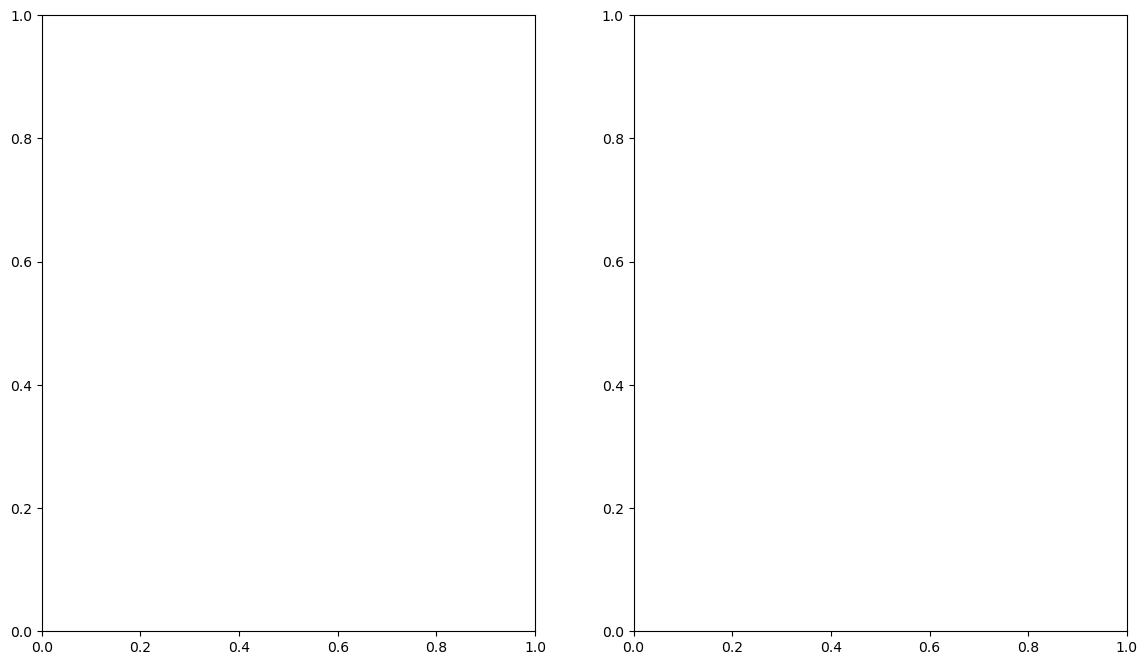

In [51]:
# Definir cores por sexo
cores = {"M": "blue", "F": "pink"}

# Criar figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

In [52]:
# Gráfico para homens
ax1.barh(tabela_agrupada_masculino["numero_idade"], tabela_agrupada_masculino["Numero de pacientes"], color=cores["M"])
ax1.set_xlabel("Numero de pacientes")
ax1.set_title("Homens")
ax1.set_ylabel("Idade") 

Text(4.444444444444452, 0.5, 'Idade')

In [53]:
# Gráfico para mulheres
ax2.barh(tabela_agrupada_feminino["numero_idade"], tabela_agrupada_feminino["Numero de pacientes"], color=cores["F"])
ax2.set_xlabel("Numero de pacientes")
ax2.set_title("Mulheres")
ax1.set_ylabel("Idade")

Text(4.444444444444452, 0.5, 'Idade')

In [60]:
# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

In [55]:
# Salvar figura em um único arquivo PNG
fig.savefig("piramide_etaria_completa.png")

# Export Final

In [56]:
rj_epilepsia_total

,data_processamento,data_atendimento_paciente,procedimento_principal,numero_cns_paciente,codigo_idade_paciente,numero_idade,data_completa_atendimento,sexo_paciente,raca_paciente,codigo_uf_municipio_residencia,...,numero_apac_anterior,cid_causas_associadas,cid_principal,cid_sencundario,motivo_saida_permanencia_extenso,procedimento_principal_extenso,codigo_uf_municipio_residencia_extenso,data_atendimento,idade_extenso,idade_decimal
0,201501,201501,604190018,âäâ{{~é|{||â{Ç},4,7,20150102,F,99,330580,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Vigabatrina 500 MG,Teresópolis,2015-01-01,7 anos,7.0
1,201501,201501,604500084,âäâ{{}ä}â{âÇüäâ,4,17,20150102,F,99,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Itatiaia,2015-01-01,17 anos,17.0
2,201501,201501,604500076,âäâ{{|}é~{â{ââ,4,14,20150102,F,99,330350,...,0,0,G400,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,Nova Iguaçu,2015-01-01,14 anos,14.0
3,201501,201412,604500017,}{{ü|ÇÇüâü{{{{,4,58,20141202,F,99,330070,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Gabapentina 300 MG,Cabo Frio,2014-12-01,58 anos,58.0
4,201501,201501,604500084,é{{ü{üüü|}ü~,4,6,20141202,F,99,330455,...,0,0,G404,0,Permanencia_Caracteristicas_Doenca,Topiramato 100 MG,Rio de Janeiro,2015-01-01,6 anos,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89343,202312,202312,604500076,é{âÇ{}~üâÇâ}{éÇ,4,89,20231129,F,1,330480,...,0,0,G408,0,Permanencia_Caracteristicas_Doenca,Topiramato 50 MG,São Fidélis,2023-12-01,89 anos,89.0
89344,202312,202312,604500050,é{}ä{|Ç{äâ|}Çé,4,61,20231110,F,1,330455,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Lamotrigina 100 MG,Rio de Janeiro,2023-12-01,61 anos,61.0
89345,202312,202312,604500106,é{âÇ{}~}|éÇéüéé,4,17,20230926,M,3,330240,...,0,0,G402,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Macaé,2023-12-01,17 anos,17.0
89346,202312,202312,604500106,é{|â{â}ä~äé{,4,18,20231019,F,2,330225,...,0,0,G403,0,Permanencia_Caracteristicas_Doenca,Levetiracetam 250 MG,Itatiaia,2023-12-01,18 anos,18.0


In [57]:
# Export

rj_epilepsia_total.to_csv('../Dados/Base atualizada/rj_epilepsia_total.csv', sep =';')